# Aggregations: Min, Max, and Everything In Between

Numpy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here

## Summing the Values in an Array

As as quick example, consider computing the sum of all values in an array. Python itself can do this using the buil-in `sum` function:

In [2]:
import numpy as np

In [3]:
L = np.random.random(100)

In [4]:
sum(L)

52.26043277604201

In [5]:
np.sum(L)

52.260432776042

NumPy version of the operation is computed much more quickly:

In [6]:
big_array = np.random.rand(1_000_000)

In [7]:
%timeit sum(big_array)
%timeit np.sum(big_array)

179 ms ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.18 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Minimun and Maximum

In [8]:
min(big_array), max(big_array)

(6.990105299031768e-07, 0.9999992162584009)

In [9]:
%timeit min(big_array)
%timeit np.min(big_array)

84.3 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
471 µs ± 23.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For `min` and `max` and `sum`, and seveal other NumPy aggregates a shorter syntax is to use methods ofthe array object itself:

In [10]:
print(big_array.min(), big_array.max(), big_array.sum())

6.990105299031768e-07 0.9999992162584009 499848.77304655063


## Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [11]:
M = np.random.random((3, 4))
print(M)

[[0.17768175 0.26264154 0.63198318 0.50042224]
 [0.52442396 0.5038188  0.56468719 0.29566009]
 [0.37235568 0.10338796 0.66210778 0.00653843]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

M.sum()

Aggregation functions take an additional argument specifying the axis along which the aggregate is computed. 
For example, we can find the minimum value within each column by specifying `axis=0`.

In [12]:
M.min(axis=0)

array([0.17768175, 0.10338796, 0.56468719, 0.00653843])

In [13]:
M.max(axis=1)

array([0.63198318, 0.56468719, 0.66210778])

The `axis` keyword specifies the dimension of hte arrya that will be collapsed. So specigying `axis=0` means that the first axis will be collapsed. For two-dimensional arrays, this means that values within each column will be aggregated.

## Other aggregations functions

Most aggregates have a `NaN` safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point `NaN` value.


```
Function Name 	NaN-safe Version 	Description
np.sum 	np.nansum 	Compute sum of elements
np.prod 	np.nanprod 	Compute product of elements
np.mean 	np.nanmean 	Compute mean of elements
np.std 	np.nanstd 	Compute standard deviation
np.var 	np.nanvar 	Compute variance
np.min 	np.nanmin 	Find minimum value
np.max 	np.nanmax 	Find maximum value
np.argmin 	np.nanargmin 	Find index of minimum value
np.argmax 	np.nanargmax 	Find index of maximum value
np.median 	np.nanmedian 	Compute median of elements
np.percentile 	np.nanpercentile 	Compute rank-based statistics of elements
np.any 	N/A 	Evaluate whether any elements are true
np.all 	N/A 	Evaluate whether all elements are true
```


## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values. As a simple example, let's consider the heighs of all US presidents. This
data is available in the file presidents_heigths.csv

In [18]:
import pandas as pd 

In [21]:
data = pd.read_csv('./data/president_heights.csv')
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [24]:
heigths = np.array(data['height(cm)'])
print(heigths)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [25]:
print(f"mean heigth:{heigths.mean()}")
print(f"Standard deviation:{heigths.std()}")
print(f"Minimum heigth:{heigths.min()}")
print(f"Maximum heigth:{heigths.max()}")



mean heigth:179.73809523809524
Standard deviation:6.931843442745892
Minimum heigth:163
Maximum heigth:193


The aggregation operation reduced the entire array to a single summarizing value. We may also wish to compute quantiles:

In [30]:
print('25th percentile: ', np.percentile(heigths, 25))
print('median: ', np.median(heigths))
print('75th percentile: ', np.percentile(heigths, 75))

25th percentile:  174.25
median:  182.0
75th percentile:  183.0


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot style

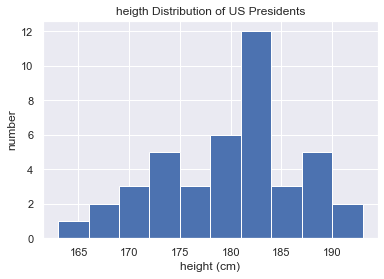

In [34]:
plt.hist(heigths)
plt.title("heigth Distribution of US Presidents")
plt.xlabel('height (cm)')
plt.ylabel('number');